In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import arange
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter('ignore')

In [33]:
## Calulcating metrics
def calculate_metrics(df, crop_names, y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test,y_pred)
    y_test_avg = pd.DataFrame(y_test).mean().iloc[0]
    y_pred_avg = pd.DataFrame(y_pred).mean().iloc[0]
    df.loc[crop_names] = [mae, mse, rmse, mape, r2, y_test_avg, y_pred_avg]


In [34]:
fao_data = pd.read_csv("latest_2504.csv", index_col='Unnamed: 0')

fao_data.columns

Index(['Nutrient nitrogen N (total) - tonnes',
       'Nutrient phosphate P2O5 (total) - tonnes',
       'Nutrient potash K2O (total) - tonnes', 'Item', 'Yield(tonnes/ha)',
       'Fung & Bact – Benzimidazoles', 'Fung & Bact – Diazines, morpholines',
       'Fung & Bact – Dithiocarbamates', 'Fung & Bact – Inorganics',
       'Fung & Bact – Other',
       ...
       'Rodenticides – Other-3', 'Herbicides – Bipiridils-1',
       'Herbicides – Bipiridils-2', 'Herbicides – Bipiridils-3',
       'Herbicides – Sulfonyl ureas-1', 'Herbicides – Sulfonyl ureas-2',
       'Herbicides – Sulfonyl ureas-3', 'Rodenticides – Anti-coagulants-1',
       'Rodenticides – Anti-coagulants-2', 'Rodenticides – Anti-coagulants-3'],
      dtype='object', length=114)

In [35]:
x_vals = ['Nutrient nitrogen N (total) - tonnes',
 'Nutrient phosphate P2O5 (total) - tonnes',
 'Nutrient potash K2O (total) - tonnes',
 'Fung & Bact – Benzimidazoles',
 'Fung & Bact – Diazines, morpholines',
 'Fung & Bact – Dithiocarbamates',
 'Fung & Bact – Inorganics',
 'Fung & Bact – Other',
 'Fung & Bact – Triazoles, diazoles',
 'Herbicides – Amides',
 'Herbicides – Carbamates',
 'Herbicides – Dinitroanilines',
 'Herbicides – Other',
 'Herbicides – Phenoxy hormone products',
 'Herbicides – Triazines',
 'Herbicides – Urea derivates',
 'Insecticides – Botanical products and biologicals',
 'Insecticides – Carbamates',
 'Insecticides – Organo-phosphates',
 'Insecticides – Other',
 'Insecticides – Pyrethroids',
 'Mineral Oils',
 'Plant Growth Regulators',
 'Rodenticides – Other',
 'Herbicides – Bipiridils',
 'Herbicides – Sulfonyl ureas',
 'Rodenticides – Anti-coagulants',
 'Nutrient nitrogen N (total) - tonnes-1',
 'Nutrient nitrogen N (total) - tonnes-2',
 'Nutrient nitrogen N (total) - tonnes-3',
 'Nutrient phosphate P2O5 (total) - tonnes-1',
 'Nutrient phosphate P2O5 (total) - tonnes-2',
 'Nutrient phosphate P2O5 (total) - tonnes-3',
 'Nutrient potash K2O (total) - tonnes-1',
 'Nutrient potash K2O (total) - tonnes-2',
 'Nutrient potash K2O (total) - tonnes-3',
 'Yield(tonnes/ha)-1',
 'Yield(tonnes/ha)-2',
 'Yield(tonnes/ha)-3',
 'Fung & Bact – Benzimidazoles-1',
 'Fung & Bact – Benzimidazoles-2',
 'Fung & Bact – Benzimidazoles-3',
 'Fung & Bact – Diazines, morpholines-1',
 'Fung & Bact – Diazines, morpholines-2',
 'Fung & Bact – Diazines, morpholines-3',
 'Fung & Bact – Dithiocarbamates-1',
 'Fung & Bact – Dithiocarbamates-2',
 'Fung & Bact – Dithiocarbamates-3',
 'Fung & Bact – Inorganics-1',
 'Fung & Bact – Inorganics-2',
 'Fung & Bact – Inorganics-3',
 'Fung & Bact – Other-1',
 'Fung & Bact – Other-2',
 'Fung & Bact – Other-3',
 'Fung & Bact – Triazoles, diazoles-1',
 'Fung & Bact – Triazoles, diazoles-2',
 'Fung & Bact – Triazoles, diazoles-3',
 'Herbicides – Amides-1',
 'Herbicides – Amides-2',
 'Herbicides – Amides-3',
 'Herbicides – Carbamates-1',
 'Herbicides – Carbamates-2',
 'Herbicides – Carbamates-3',
 'Herbicides – Dinitroanilines-1',
 'Herbicides – Dinitroanilines-2',
 'Herbicides – Dinitroanilines-3',
 'Herbicides – Other-1',
 'Herbicides – Other-2',
 'Herbicides – Other-3',
 'Herbicides – Phenoxy hormone products-1',
 'Herbicides – Phenoxy hormone products-2',
 'Herbicides – Phenoxy hormone products-3',
 'Herbicides – Triazines-1',
 'Herbicides – Triazines-2',
 'Herbicides – Triazines-3',
 'Herbicides – Urea derivates-1',
 'Herbicides – Urea derivates-2',
 'Herbicides – Urea derivates-3',
 'Insecticides – Botanical products and biologicals-1',
 'Insecticides – Botanical products and biologicals-2',
 'Insecticides – Botanical products and biologicals-3',
 'Insecticides – Carbamates-1',
 'Insecticides – Carbamates-2',
 'Insecticides – Carbamates-3',
 'Insecticides – Organo-phosphates-1',
 'Insecticides – Organo-phosphates-2',
 'Insecticides – Organo-phosphates-3',
 'Insecticides – Other-1',
 'Insecticides – Other-2',
 'Insecticides – Other-3',
 'Insecticides – Pyrethroids-1',
 'Insecticides – Pyrethroids-2',
 'Insecticides – Pyrethroids-3',
 'Mineral Oils-1',
 'Mineral Oils-2',
 'Mineral Oils-3',
 'Plant Growth Regulators-1',
 'Plant Growth Regulators-2',
 'Plant Growth Regulators-3',
 'Rodenticides – Other-1',
 'Rodenticides – Other-2',
 'Rodenticides – Other-3',
 'Herbicides – Bipiridils-1',
 'Herbicides – Bipiridils-2',
 'Herbicides – Bipiridils-3',
 'Herbicides – Sulfonyl ureas-1',
 'Herbicides – Sulfonyl ureas-2',
 'Herbicides – Sulfonyl ureas-3',
 'Rodenticides – Anti-coagulants-1',
 'Rodenticides – Anti-coagulants-2',
 'Rodenticides – Anti-coagulants-3']

In [36]:
fao_data['Category'].value_counts()

Vegetables and Legumes    670
Fruits and Nuts           450
Industrial_crops          237
Cereals                   217
Name: Category, dtype: int64

In [37]:
cat_names = fao_data['Category'].unique()
cat_names

array(['Fruits and Nuts', 'Vegetables and Legumes', 'Cereals',
       'Industrial_crops'], dtype=object)

In [38]:
quality_metrics = ['Random_forest_MAE', 'Random_forest_MSE', 'Random_forest_RMSE', 'Random_forest_MAPE','Random_forest_r2_score', 'y_test_avg', 'y_pred_avg']
error_df = pd.DataFrame(columns = quality_metrics, index = cat_names)
display(error_df)

,Random_forest_MAE,Random_forest_MSE,Random_forest_RMSE,Random_forest_MAPE,Random_forest_r2_score,y_test_avg,y_pred_avg
Fruits and Nuts,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vegetables and Legumes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cereals,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industrial_crops,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
##take more splits
## take more 

mmsc_X = MinMaxScaler()
for cat in cat_names:
    crop_df = fao_data[fao_data['Category'] == cat]
    x = mmsc_X.fit_transform(crop_df[x_vals])
    y = crop_df['Yield(tonnes/ha)']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=False)
    regressor = RandomForestRegressor(n_estimators = 500, random_state = 42, max_depth= 10)
    regressor.fit(x_train, y_train)
    #display(pd.DataFrame(x_train))
    #display(pd.DataFrame(y_test)['Yield(tonnes/ha)'])
   #  #prediction of new value
    y_pred = regressor.predict(x_test)
   # display(pd.DataFrame(y_pred))
    calculate_metrics(error_df, cat, pd.DataFrame(y_test), y_pred)
    
  #['Yield(tonnes/ha)']
    

In [44]:
error_df

,Random_forest_MAE,Random_forest_MSE,Random_forest_RMSE,Random_forest_MAPE,Random_forest_r2_score,y_test_avg,y_pred_avg
Fruits and Nuts,4.735578,37.360206,6.1123,0.96327,0.301619,8.822054,9.390697
Vegetables and Legumes,21.724017,1664.648384,40.800103,3.025965,0.598193,47.336589,39.918789
Cereals,0.425948,0.388764,0.623509,0.155576,0.92911,6.813392,6.88002
Industrial_crops,0.665193,0.902214,0.94985,0.208125,0.206077,3.349255,3.252531


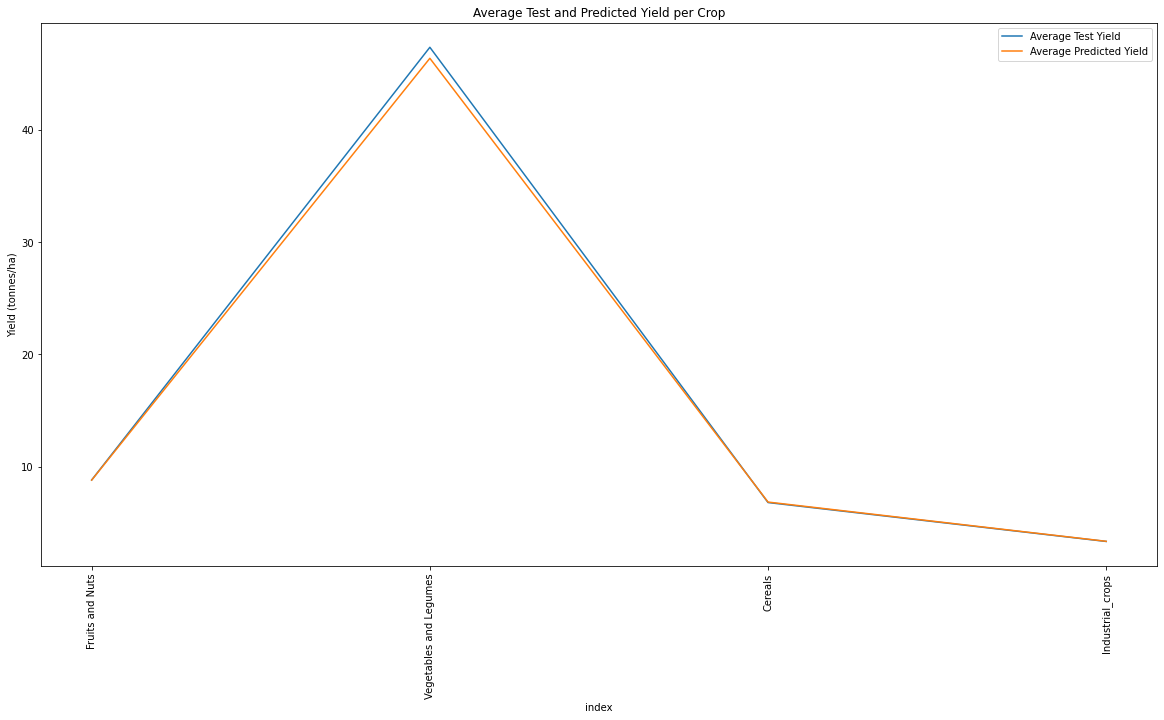

In [27]:
avg_df = error_df[['y_test_avg', 'y_pred_avg']].reset_index()



#create a line plot of the average test and predicted yield per crop
plt.figure(figsize=(20, 10))
plt.plot(avg_df['index'], avg_df['y_test_avg'], label='Average Test Yield')
plt.plot(avg_df['index'], avg_df['y_pred_avg'], label='Average Predicted Yield')
plt.xticks(rotation=90)
plt.xlabel('index')
plt.ylabel('Yield (tonnes/ha)')
plt.title('Average Test and Predicted Yield per Crop')
plt.legend()
plt.show()